References:

In [ ]:
"""
https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
https://towardsdatascience.com/image-classification-python-keras-tutorial-kaggle-challenge-45a6332a58b8
https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53
https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks/
https://keras.io/layers/about-keras-layers/
https://stackoverflow.com/questions/42786717/how-to-calculate-the-number-of-parameters-for-convolutional-neural-network/42787467
"""

'\nhttps://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html\nhttps://towardsdatascience.com/image-classification-python-keras-tutorial-kaggle-challenge-45a6332a58b8\nhttps://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53\nhttps://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks/\nhttps://keras.io/layers/about-keras-layers/\nhttps://stackoverflow.com/questions/42786717/how-to-calculate-the-number-of-parameters-for-convolutional-neural-network/42787467\n'

Imoprt Libs



In [ ]:

import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from keras.callbacks import TensorBoard
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras import losses, optimizers
import matplotlib.pyplot as plt
import numpy as np 
from keras.utils import plot_model
import os
import shutil
%tensorflow_version 2.x


Mount Google Drive as Folder

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
"""
Shared Folder Path:
/content/gdrive/.shortcut-targets-by-id/19DpAvLlnJmRoNEwpEffIrSLfPbn5IxM7/Face Recognition Challenge - 2020
"""

'\nShared Folder Path:\n/content/gdrive/.shortcut-targets-by-id/19DpAvLlnJmRoNEwpEffIrSLfPbn5IxM7/Face Recognition Challenge - 2020\n'

In [ ]:
#DO NOT RUN UNTIL FULLY AWARE ABOUT UTILITY OF THIS SNIPPET
"""
!cp -r '/content/gdrive/.shortcut-targets-by-id/19DpAvLlnJmRoNEwpEffIrSLfPbn5IxM7/Face Recognition Challenge - 2020/.' '/content/gdrive/My Drive/AI_Face_Recognition/Data'
"""

"\n!cp -r '/content/gdrive/.shortcut-targets-by-id/19DpAvLlnJmRoNEwpEffIrSLfPbn5IxM7/Face Recognition Challenge - 2020/.' '/content/gdrive/My Drive/AI_Face_Recognition/Data'\n"

In [ ]:
#%cd /content/gdrive/My Drive/AI_Face_Recognition

Functions:

In [ ]:
"""Resize images to custom resolution"""
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]
    if width is None and height is None:
        return image
    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))
    resized = cv2.resize(image, dim, interpolation = inter)
    return resized

In [ ]:
def get_photo_gallery(images_arr, n_row = 2, n_col = 7):
    images_arr = images_arr.copy()
    counter = 0
    himages = []
    vimages = []
    if len(images_arr) < (n_row * n_col):
      for i in range((n_row * n_col) - len(images_arr)):
        images_arr.append(np.zeros(images_arr[0].shape[:2]))
    for i in range(n_row):
        for j in range(n_col):
            himages.append(images_arr[counter])
            counter+=1
        himage=np.hstack((himages))
        vimages.append(himage)
        himages = []
    image_matrix = np.vstack((vimages))
    return image_matrix

Miscellaneous


In [ ]:
#@title Convert to Sketch
"""
img = image_resize(image.copy(), height=512)
width = int(img.shape[1])
height = int(img.shape[0])

kernel_sharpening = np.array([[-1,-1,-1], 
								[-1, 8.5, -1],
								[-1, -1, -1]])
sharpened = cv2.filter2D(img, -1, kernel_sharpening)
gray = cv2.cvtColor(sharpened, cv2.COLOR_BGR2GRAY)
inv = gray
gauss = cv2.GaussianBlur(inv,ksize=(15,15), sigmaX=0, sigmaY=0)

def dodgeV2(image,mask):
	return cv2.divide(image,mask, scale=256)

pencil_jc = dodgeV2(gray,gauss)
cv2_imshow(pencil_jc)
"""

'\nimg = image_resize(image.copy(), height=512)\nwidth = int(img.shape[1])\nheight = int(img.shape[0])\n\nkernel_sharpening = np.array([[-1,-1,-1], \n\t\t\t\t\t\t\t\t[-1, 8.5, -1],\n\t\t\t\t\t\t\t\t[-1, -1, -1]])\nsharpened = cv2.filter2D(img, -1, kernel_sharpening)\ngray = cv2.cvtColor(sharpened, cv2.COLOR_BGR2GRAY)\ninv = gray\ngauss = cv2.GaussianBlur(inv,ksize=(15,15), sigmaX=0, sigmaY=0)\n\ndef dodgeV2(image,mask):\n\treturn cv2.divide(image,mask, scale=256)\n\npencil_jc = dodgeV2(gray,gauss)\ncv2_imshow(pencil_jc)\n'

Import Image and classifiers

In [ ]:
"""
%cd /content/gdrive/My Drive/AI_Face_Recognition/
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
%cd -
image = cv2.imread('/content/gdrive/My Drive/AI_Face_Recognition/Data/17BIT022/17BIT022_Male_Fear_RGB.png', cv2.IMREAD_GRAYSCALE)
image = image_resize(image, height=512)
"""

/content/gdrive/My Drive/AI_Face_Recognition
/content


Detect Face

[[ 69 225 275 275]]


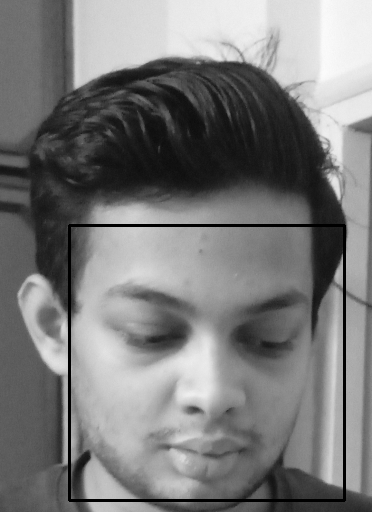

In [ ]:
"""
image_copy = image.copy()
face_rect = face_cascade.detectMultiScale(image_copy, scaleFactor = 1.1, minNeighbors = 5, minSize=(60,60))      
for (x, y, w, h) in face_rect:
    cv2.rectangle(image_copy, (x, y),(x + w, y + h), (0, 0, 0), 2)
    print(face_rect)
cv2_imshow(image_copy)
#cv2_imshow(image_copy[y:y+h, x:x+w])
"""

In [ ]:
"""
shutil.rmtree('/content/gdrive/My Drive/AI_Face_Recognition/Data_additional_Face')
%mkdir '/content/gdrive/My Drive/AI_Face_Recognition/Data_additional_Face'
class_names = os.listdir('/content/gdrive/My Drive/AI_Face_Recognition/Data/')
for folder in class_names:
  current_dir = '/content/gdrive/My Drive/AI_Face_Recognition/Data/' + folder + '/'
  new_dir_face = '/content/gdrive/My Drive/AI_Face_Recognition/Data_additional_Face/' + folder + '/'
  os.mkdir('/content/gdrive/My Drive/AI_Face_Recognition/Data_additional_Face/' + folder)
  file_list = os.listdir(current_dir)
  for f in file_list:
    if "Sketch" in f:
      img = cv2.imread(current_dir + f, cv2.IMREAD_GRAYSCALE)
    else:
      img = cv2.imread(current_dir + f)
    multi_image_label = 0
    img = image_resize(img, height=512)
    img_rect = face_cascade.detectMultiScale(img, scaleFactor = 1.1, minNeighbors = 5, minSize=(60,60))
    face_detected = False
    for (x, y, w, h) in img_rect:
      img_face = image_resize(img[y:y+h, x:x+w], height=256)
      cv2.imwrite(new_dir_face + str(multi_image_label) + f, img_face)
      multi_image_label += 1
      face_detected = True
    if face_detected == False:
      cv2.imwrite(new_dir_face + f, image_resize(img, height=256))
    else:
      cv2.imwrite(new_dir_face + 'Org' + f, image_resize(img, height=256))
"""

In [ ]:
#logdir = "/content/gdrive/My Drive/AI_Face_Recognition/logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = TensorBoard(log_dir=logdir)
model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), input_shape=(256,256,1),padding='same', activation='relu', name='Convolution_Layer_1'))
model.add(MaxPooling2D(pool_size=(2,2), name='Pooling_Layer_1'))
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', name='Convolution_Layer_2'))
model.add(MaxPooling2D(pool_size=(2,2), name='Pooling_Layer_2'))
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', name='Convolution_Layer_3'))
model.add(MaxPooling2D(pool_size=(2,2), name='Pooling_Layer_3'))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer ='uniform', name='Dense_Layer_1'))
model.add(Dense(128, activation='tanh', kernel_initializer ='uniform', name='Dense_Layer_2'))
model.add(Dense(20, activation='softmax', kernel_initializer ='uniform', name='Output_Layer'))
model.compile(optimizer='adam', loss=losses.mean_squared_error, metrics=['accuracy']) #get default parameters from optimizers.adam
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Convolution_Layer_1 (Conv2D) (None, 256, 256, 16)      160       
_________________________________________________________________
Pooling_Layer_1 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
Convolution_Layer_2 (Conv2D) (None, 128, 128, 32)      4640      
_________________________________________________________________
Pooling_Layer_2 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
Convolution_Layer_3 (Conv2D) (None, 64, 64, 64)        18496     
_________________________________________________________________
Pooling_Layer_3 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 65536)            

In [ ]:
tf.random.set_seed(0)
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest',
                                  validation_split=0.2)

In [ ]:
img_height, img_width = 256, 256
batch_size = 10

In [ ]:
"""
%rm -R /content/gdrive/My Drive/AI_Face_Recognition/Augmented_Data/train
%rm -R /content/gdrive/My Drive/AI_Face_Recognition/Augmented_Data/validation
%mkdir /content/gdrive/My Drive/AI_Face_Recognition/Augmented_Data/train
%mkdir /content/gdrive/My Drive/AI_Face_Recognition/Augmented_Data/validation
"""
train_generator = train_datagen.flow_from_directory(
    '/content/gdrive/My Drive/AI_Face_Recognition/Data',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    #save_to_dir='Augmented_Data/train',
    seed=0,
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    '/content/gdrive/My Drive/AI_Face_Recognition/Data', # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    #save_to_dir='Augmented_Data/validation',
    seed=0,
    subset='validation') # set as validation data

Found 429 images belonging to 20 classes.
Found 96 images belonging to 20 classes.


In [ ]:
history = model.fit_generator(train_generator,
                              steps_per_epoch = train_generator.samples // batch_size,
                              validation_data = validation_generator, 
                              validation_steps = validation_generator.samples // batch_size,
                              #callbacks=[tensorboard_callback],
                              epochs = 10)

Epoch 1/15
28/28 [==============================] - 30s 1s/step - loss: 0.0079 - accuracy: 0.8986 - val_loss: 0.0266 - val_accuracy: 0.7111
Epoch 2/15
28/28 [==============================] - 30s 1s/step - loss: 0.0077 - accuracy: 0.9010 - val_loss: 0.0317 - val_accuracy: 0.6914
Epoch 3/15
28/28 [==============================] - 30s 1s/step - loss: 0.0078 - accuracy: 0.8976 - val_loss: 0.0160 - val_accuracy: 0.7037
Epoch 4/15
28/28 [==============================] - 30s 1s/step - loss: 0.0068 - accuracy: 0.9216 - val_loss: 0.0131 - val_accuracy: 0.7901
Epoch 5/15
28/28 [==============================] - 30s 1s/step - loss: 0.0058 - accuracy: 0.9262 - val_loss: 0.0230 - val_accuracy: 0.7407
Epoch 6/15
28/28 [==============================] - 33s 1s/step - loss: 0.0048 - accuracy: 0.9461 - val_loss: 0.0129 - val_accuracy: 0.8272
Epoch 7/15
28/28 [==============================] - 30s 1s/step - loss: 0.0047 - accuracy: 0.9500 - val_loss: 0.0339 - val_accuracy: 0.7407
Epoch 8/15
28/28 [==

In [ ]:
"""
%load_ext tensorboard
%tensorboard --logdir logs20200504-154045
"""

'\n%load_ext tensorboard\n%tensorboard --logdir logs20200504-154045\n'

In [ ]:
plot_model(model,show_layer_names=True, show_shapes=True, expand_nested=True, to_file='/content/gdrive/My Drive/AI_Face_Recognition/model.pdf', dpi=300)
# None = batch_size

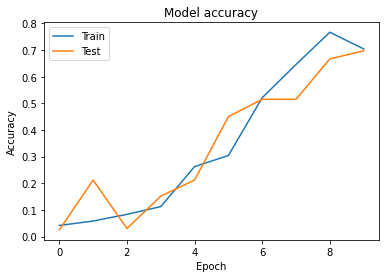

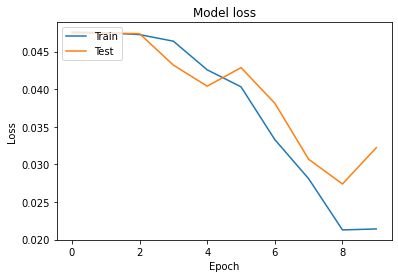

In [ ]:
"""
!kill 2121
"""
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
#plt.savefig('/content/gdrive/My Drive/AI_Face_Recognition/Accuracy_vs_Epoch.pdf')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
#plt.savefig('/content/gdrive/My Drive/AI_Face_Recognition/Loss_vs_Epoch.pdf')
plt.show()

In [ ]:
"""
Conv L1 = 16
     L2 = 32
     L3 = 64
     RELU
Dense L1 = 256  RELU
      L2 = 128  TANH
      L3 = 20   SOFTMAX

"""                                                                                            #ANALYSIS
#batch=8  epoch=10 loss: 0.0110 - accuracy: 0.8667 - val_loss: 0.0179 - val_accuracy: 0.8000    SLIGHT OVERFIT 7%
#batch=10 epoch=10 loss: 0.0120 - accuracy: 0.8375 - val_loss: 0.0224 - val_accuracy: 0.8000    GOOD FIT 4%
#                  loss: 0.0123 - accuracy: 0.8542 - val_loss: 0.0249 - val_accuracy: 0.8250             3%
#batch=12 epoch=10 loss: 0.0147 - accuracy: 0.7833 - val_loss: 0.0184 - val_accuracy: 0.8214    ANAMOLY (VALIDATION_ACC > TRAIN_ACC)
#batch=14 epoch=10 loss: 0.0177 - accuracy: 0.7566 - val_loss: 0.0263 - val_accuracy: 0.6786    SLIGHT OVERFIT 7%
#batch=16 epoch=10 loss: 0.0138 - accuracy: 0.8458 - val_loss: 0.0225 - val_accuracy: 0.6875    OVERFIT 15%
"""
Data_additional_Face Model
"""
#batch=10 epoch=15 loss: 0.0099 - accuracy: 0.8783 - val_loss: 0.0365 - val_accuracy: 0.5349
#batch=15 epoch=15 loss: 0.0030 - accuracy: 0.9632 - val_loss: 0.0235 - val_accuracy: 0.7000


"""
Conv L1 = 32
     L2 = 64
     L3 = 128
     RELU
Dense L1 = 4096  RELU
      L2 = 512  TANH
      L3 = 20   SOFTMAX

"""
#batch=12 epoch=10 loss: 0.0483 - accuracy: 0.0500 - val_loss: 0.0484 - val_accuracy: 0.0500    #VERY POOR RESULT



"""
Conv L1 = 16
     L2 = 32
     L3 = 64
     RELU
Dense L1 = 4096  RELU
      L2 = 512  TANH
      L3 = 20   SOFTMAX

"""
#batch=12 epoch=10 loss: 0.0484 - accuracy: 0.0333 - val_loss: 0.0501 - val_accuracy: 0.0500    #VERY POOR RESULT



"""
Conv L1 = 16
     L2 = 32
     L3 = 64
     RELU
Dense L1 = 4096  RELU
      L2 = 256  TANH
      L3 = 20   SOFTMAX
"""
#batch=12 epoch=10 loss: 0.0480 - accuracy: 0.0375 - val_loss: 0.0478 - val_accuracy: 0.0500
#batch=16 epoch=10 loss: 0.0104 - accuracy: 0.8750 - val_loss: 0.0144 - val_accuracy: 0.8125


"""
Conv L1 = 16
     L2 = 32
     L3 = 64
     RELU
Dense L1 = 1024  RELU
      L2 = 256  TANH
      L3 = 20   SOFTMAX
"""
#batch=16 epoch=10 loss: 0.0101 - accuracy: 0.8583 - val_loss: 0.0171 - val_accuracy: 0.7500


"""
Conv L1 = 16
     L2 = 32
     L3 = 64
     RELU
Dense L1 = 1024  RELU
      L2 = 512  TANH
      L3 = 20   SOFTMAX
"""
#batch=16 epoch=10 loss: 0.0184 - accuracy: 0.7500 - val_loss: 0.0178 - val_accuracy: 0.7188   #POSSIBLE GOOD FIT 4% (NEED PARAMETER ADJUSTMENT)
#batch=14 epoch=10 loss: 0.0172 - accuracy: 0.7617 - val_loss: 0.0348 - val_accuracy: 0.5357


"""
Conv L1 = 16
     L2 = 32
     L3 = 64
     RELU
Dense L1 = 512  RELU
      L2 = 128  TANH
      L3 = 20   SOFTMAX
"""
#batch=14 epoch=10 loss: 0.0208 - accuracy: 0.7563 - val_loss: 0.0244 - val_accuracy: 0.7857    #ANAMOLY

'\nConv L1 = 16\n     L2 = 32\n     L3 = 64\n     RELU\nDense L1 = 512  RELU\n      L2 = 128  TANH\n      L3 = 20   SOFTMAX\n'

In [ ]:
#model.save('/content/gdrive/My Drive/AI_Face_Recognition/Model_6_23_PM__4_MAY.h5')
#model.save('/content/gdrive/My Drive/AI_Face_Recognition/Model_3_15_PM__6_MAY__FACE_ONLY.h5')

In [ ]:
model.load_weights('/content/gdrive/My Drive/AI_Face_Recognition/Model_6_23_PM__4_MAY.h5')

In [ ]:

test_img = cv2.imread('/content/IMG_20200506_150943.jpg', cv2.IMREAD_GRAYSCALE)
test_img = cv2.resize(test_img, dsize=(256,256), interpolation=cv2.INTER_NEAREST)
test_img_arr = (np.array(test_img))/255
"""
test_img = cv2.imread('/content/Photo on 06-05-20 at 3.03 PM.jpg', cv2.IMREAD_GRAYSCALE)
face_rect = face_cascade.detectMultiScale(test_img, scaleFactor = 1.1, minNeighbors = 5, minSize=(60,60))      
test_img_copy = test_img.copy()
for (x, y, w, h) in face_rect:
    cv2.rectangle(test_img_copy, (x, y),(x + w, y + h), (0, 0, 0), 2)
    print(face_rect)
test_img_cropped = test_img[y:y+h, x:x+w]
cv2_imshow(image_resize(test_img_copy, height=256))
cv2_imshow(image_resize(test_img_cropped, height=256))
test_img_cropped = cv2.resize(test_img_cropped, dsize=(256,256), interpolation=cv2.INTER_NEAREST)
test_img_arr = (test_img_cropped)/255
"""

"\ntest_img = cv2.imread('/content/Photo on 06-05-20 at 3.03 PM.jpg', cv2.IMREAD_GRAYSCALE)\nface_rect = face_cascade.detectMultiScale(test_img, scaleFactor = 1.1, minNeighbors = 5, minSize=(60,60))      \ntest_img_copy = test_img.copy()\nfor (x, y, w, h) in face_rect:\n    cv2.rectangle(test_img_copy, (x, y),(x + w, y + h), (0, 0, 0), 2)\n    print(face_rect)\ntest_img_cropped = test_img[y:y+h, x:x+w]\ncv2_imshow(image_resize(test_img_copy, height=256))\ncv2_imshow(image_resize(test_img_cropped, height=256))\ntest_img_cropped = cv2.resize(test_img_cropped, dsize=(256,256), interpolation=cv2.INTER_NEAREST)\ntest_img_arr = (test_img_cropped)/255\n"

Predicted Class =  17BIT048


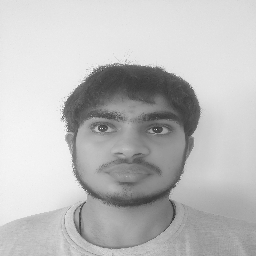

In [ ]:
#prediction_metrics = model.predict(test_img_arr.reshape((1,256,256,1)))
class_labels= list(train_generator.class_indices)
predicted_label_index = model.predict_classes(test_img_arr.reshape((1,256,256,1)))
print("Predicted Class = ",class_labels[int(predicted_label_index)])
cv2_imshow(test_img_arr*255)

Images belonging to Predicted class:


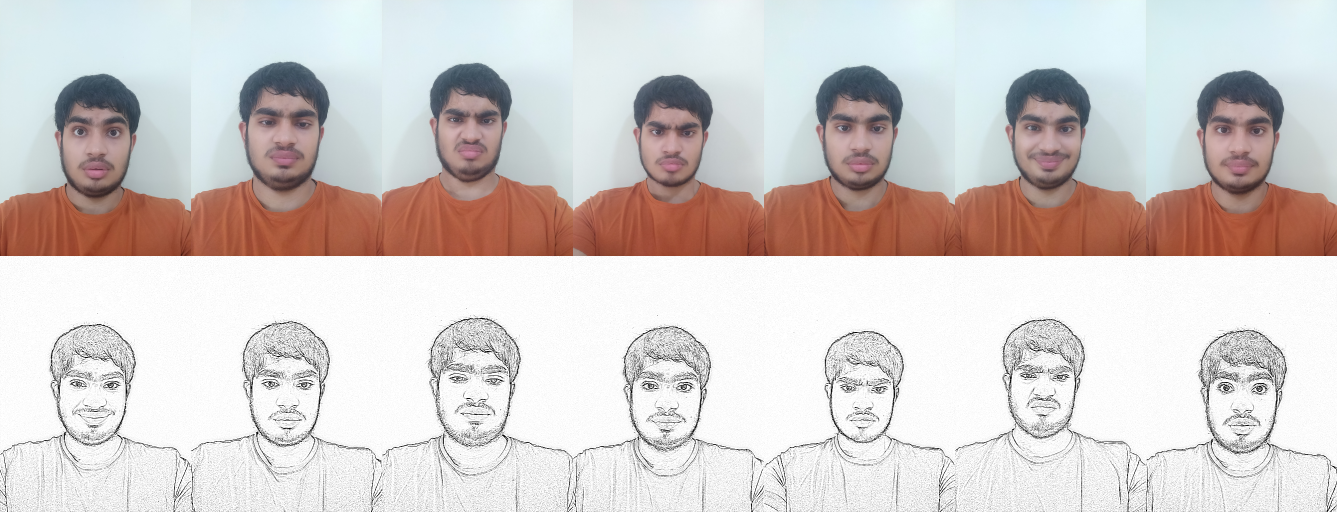

In [ ]:
path_of_class =  '/content/gdrive/My Drive/AI_Face_Recognition/Data/' + str(class_labels[int(predicted_label_index)]) + '/'
images_arr = []
file_list = os.listdir(path_of_class)
for f in file_list:
  img = cv2.imread(path_of_class + f)
  images_arr.append(image_resize(img, height=256))
print("Images belonging to Predicted class:")
cv2_imshow(get_photo_gallery(images_arr))

In [ ]:
#NEED CONSIDERABLE IMPROVEMENT
prediction_metrics = model.predict(test_img_arr.reshape((1,256,256,1)))